## 유의확률
https://datascienceschool.net/02%20mathematics/09.04%20검정과%20유의확률.html

- 우리는 두가지 정보를 알고 있다.
1. 검정통계량이 따르는 검정통계량 𝑡의 확률분포 𝑝𝑇(𝑥)를 알고 있다
2. 실제 데이터에 구한 검정통계량의 값 𝑡0, 즉 확률분포 𝑝𝑇(𝑥)의 표본 1개를 가지고 있다.


만약 우리가 최초에 가정한 귀무가설이 사실이라면 실제 데이터에서 구한 검정통계량의 값은 검정통계량 확률분포를 따르고 있으므로 기댓값이나 모드값 근처의 값이 나왔을 것이다. 반대로 우리가 가정한 귀무가설이 사실이 아니라면 실제 데이터에서 구한 검정통계량의 값은 검정통계량에서 나오기 어려운 값이 나왔을 것이다

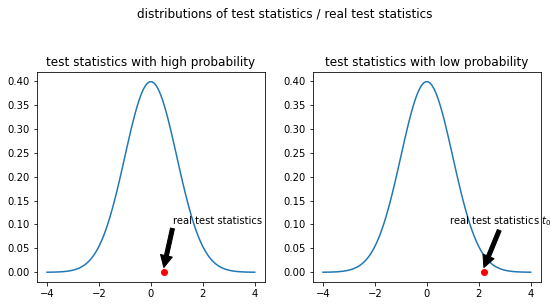

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("test statistics with high probability")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('real test statistics', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("test statistics with low probability")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('real test statistics $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.suptitle("distributions of test statistics / real test statistics", y=1.05)
plt.tight_layout()
plt.show()

그러면 어떤 표본 데이터가 해당 확률분포에서 나오기 쉬운 값인지 나오기 어려운 값인지를 어떻게 숫자로 정량화할 수 있을까? 이 방법이 바로 유의확률(p-value)이다.

- 유의확률은 확률분포와 확률분포의 표본값 1개가 주어졌을 때 그 확률분포에서 해당 표본값 혹은 더 희귀한(rare) 값이 나올 수 있는 확률로 정의한다.
- 유의확률의 값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리(tail)부분에 해당하는 영역의 면적이다.

누적확률분포함수 𝐹(𝑥)를 사용하여 다음처럼 계산할 수 있다.

$$
\begin{split} 
\begin{align}
\begin{aligned}
\text{유의확률} 
&= 2 \min ( P(t \leq t_0), P(t \geq t_0)) \\
&= 2 \min ( F(t_0), 1-F(t_0))
\end{aligned}
\tag{9.4.18}
\end{align}
\end{split}
$$

<br>

이 식에서 𝑡0는 현재 검정통계량의 값이다. 이 유의확률은 통계량분포의 양 끝단의 면적을 구하기 때문에 **양측검정 유의확률(two-sided test p-value)**이라고 한다.

- 만약 이산확률분포라면 등호가 성립하는 부분을 제외해야 하므로 다음처럼 구한다.


$$유의확률=2min(𝐹(𝑡0),1−𝐹(𝑡0−1))$$

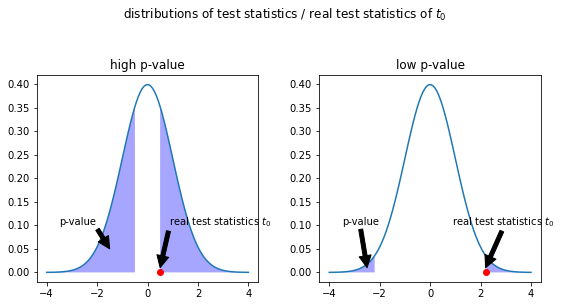

In [10]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("high p-value")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('real test statistics $t_0$', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -0.5, 100)
xx3 = np.linspace(0.5, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('p-value', xy=(-1.5, 0.05), xytext=(-3.5, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("low p-value")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('real test statistics $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -2.2, 100)
xx3 = np.linspace(2.2, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('p-value', xy=(-2.5, 0.01), xytext=(-3.5, 0.1), arrowprops=black)

plt.suptitle("distributions of test statistics / real test statistics of $t_0$", y=1.05)
plt.tight_layout()
plt.show()

## 예제
수익률이 정규분포를 따른다고 가정하면 이 주식의 검정통계량은 다음과 같이 계산한다.

$$\begin{align}
t = \dfrac{m}{\frac{s}{\sqrt{N}}} = -1.4025
\tag{9.4.32}
\end{align}$$



In [13]:
x = np.array([-0.025, -0.05, 0.043, -0.037, -0.056])
t = x.mean()/x.std(ddof=1)*np.sqrt(len(x))
t

-1.4025921414082105

만약 이 주식이 장기적으로 손실을 낸다는 것을 보이고 싶다면 대립가설은 다음과 같다.

$$
\begin{align}
H_a:\mu < 0
\tag{9.4.33}
\end{align}
$$

𝜇가 클수록 검정통계량도 커지므로 이 때는 좌측검정 유의확률을 구해야 한다. 이 값은 약 11.67%다.

$$\begin{split}
\begin{align}
\begin{aligned}
\text{유의확률} 
&=t(t\leq -1.4025;\nu=4,\mu=0) \\
&= F(-1.4025;\nu=4,\mu=0) \\
&= 0.1167
\end{aligned}
\tag{9.4.34}
\end{align}
\end{split}$$

In [14]:
# 자유도 4의 student t 분포를 따르는 분포의 누적분포함수에서, 검정통계량 t에 대응하는 확률값
sp.stats.t(df=4).cdf(t)

0.11669216509589829

#### 만약 유의수준이 10%라면 유의확률이 이보다 크기 때문에 귀무가설을 기각할 수 없다.
#### 즉, 정규분포의 기댓값이 0보다 작다고 말할수 없다.
#### 이는 해당 주식이 장기적으로 손실을 보는 주식이라고 말할 수 있는 증거가 부족하다는 의미다.

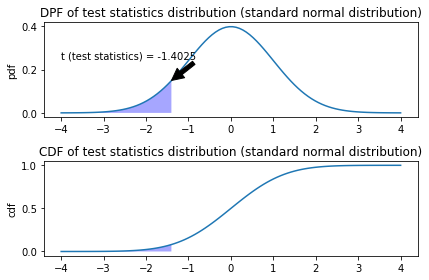

In [12]:
rv = sp.stats.norm()

xx = np.linspace(-4, 4, 100)

plt.subplot(211)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("pdf")
plt.title("DPF of test statistics distribution (standard normal distribution)")
black = {"facecolor": "black"}
plt.annotate('t (test statistics) = -1.4025', xy=(-1.4, 0.15), xytext=(-4, 0.25), arrowprops=black)
xx2 = np.linspace(-4, -1.4025, 100)
plt.fill_between(xx2, rv.pdf(xx2), facecolor='blue', alpha=0.35)

plt.subplot(212)
plt.plot(xx, rv.cdf(xx))
plt.fill_between(xx2, rv.cdf(xx2), facecolor='blue', alpha=0.35)
plt.ylabel("cdf")
plt.title("CDF of test statistics distribution (standard normal distribution)")

plt.tight_layout()
plt.show()